In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
from jupyterthemes import jtplot
jtplot.style()

%matplotlib inline

### Bringing in only ranges of columns that WERE NOT denoted as 'unused' in the CSV file, plus one column that Ben said he did use, plus one duplicate column.

In [2]:
range1 = [i for i in range(0,9)]
range2 = [i for i in range(17,22)]
range3 = [i for i in range(26,27)]
range4 = [i for i in range(35,36)]
range5 = [i for i in range(37,38)]
range6 = [i for i in range(48,50)]
range7 = [i for i in range(51,56)]
range8 = [i for i in range(59,163)]
range9 = [i for i in range(164,184)]
usecols = range1+range2+range3+range4+range5+range6+range7+range8+range9
teeth = pd.read_csv('..//Data/Smileon_2021_10_17.csv', skiprows = 2, usecols=usecols)

In [3]:
print(teeth.shape)
teeth.head()

(57860, 148)


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,CountyName,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,NaN,Rutherford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,SMILE ON 60+ Registration,NaN,9/30/2021 16:53,9/30/2021 16:53,0,4431194,123747,NaN,Davidson,...,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN,NaN
2,93115081,SMILE ON 60+ Clinical,NaN,9/30/2021 16:50,9/30/2021 16:51,1,2941341,161979,NaN,Shelby,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
3,93115032,SMILE ON 60+ Clinical,NaN,9/30/2021 16:48,9/30/2021 16:49,1,3823933,161979,NaN,Shelby,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
4,93114968,SMILE ON 60+ Clinical,NaN,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,NaN,Shelby,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN


In [4]:
# Dropping columns that contain "NaN" values for the entire column. 
teeth = teeth.dropna(axis=1, how='all')
teeth.shape

(57860, 120)

In [5]:
teeth.CallerNum.value_counts()

-1          63
 3212379    54
 2441776    43
 2758373    42
 2431132    37
            ..
 3604783     1
 2982163     1
 3852376     1
 2826507     1
 2451720     1
Name: CallerNum, Length: 10711, dtype: int64

### Total Number of Patients Called = 10,711

In [6]:
#After seeing that a single patient will have multiple entries, I created a second df to remove duplicate
#patient entries so I could get an accurate count on patient demographics.
teeth_demographics = teeth.drop_duplicates('CallerNum', keep='first')
print(teeth_demographics.shape)
teeth_demographics.CallerNum.value_counts()

(10711, 120)


4194304    1
4072097    1
2951844    1
2458277    1
2834996    1
          ..
2469239    1
3102072    1
3001028    1
3048826    1
2525183    1
Name: CallerNum, Length: 10711, dtype: int64

In [7]:
#Checking to see if there are any NaN values in the CallerNum(Patient ID) column
teeth.CallerNum.isnull().sum()

0

In [8]:
print(teeth_demographics['SMILE ON 60+ Demographic Information - Gender'].isnull().sum())
teeth_demographics['SMILE ON 60+ Demographic Information - Gender'].value_counts()

120


Female         6774
Male           3815
Transgender       1
Other             1
Name: SMILE ON 60+ Demographic Information - Gender, dtype: int64

### GENDER BREAKDOWN: 6774 Female; 3815 Male; 1 Transgender, 1 Other, 120 NaN values.

In [9]:
t_gender = teeth_demographics['SMILE ON 60+ Demographic Information - Gender'].value_counts()
t_gender = pd.DataFrame(t_gender).reset_index()
t_gender.columns = ['gender', 'count']
t_gender

,gender,count
0,Female,6774
1,Male,3815
2,Transgender,1
3,Other,1


Text(0, 0.5, 'Count')

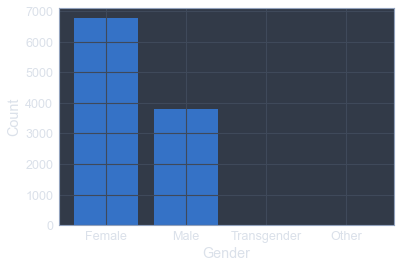

In [10]:
plt.bar(t_gender['gender'], t_gender['count'])
plt.xlabel('Gender')
plt.ylabel('Count')

In [11]:
print(teeth_demographics['SMILE ON 60+ Demographic Information - Race/Ethnicity'].isnull().sum())
teeth_demographics['SMILE ON 60+ Demographic Information - Race/Ethnicity'].value_counts()

1301


Caucasian                            5934
African American                     2660
Hispanic                              456
Asian                                 151
Unknown                               115
American Indian and Alaska Native      52
Multi-racial                           33
Pacific Islander                        9
Name: SMILE ON 60+ Demographic Information - Race/Ethnicity, dtype: int64

### Race/Ethnicity Breakdown Above^^^

In [12]:
t_race = teeth_demographics['SMILE ON 60+ Demographic Information - Race/Ethnicity'].value_counts()
t_race = pd.DataFrame(t_race).reset_index()
t_race.columns = ['Race/Ethnicity', 'Count']
t_race

,Race/Ethnicity,Count
0,Caucasian,5934
1,African American,2660
2,Hispanic,456
3,Asian,151
4,Unknown,115
5,American Indian and Alaska Native,52
6,Multi-racial,33
7,Pacific Islander,9


Text(0, 0.5, 'Race/Ethnicity')

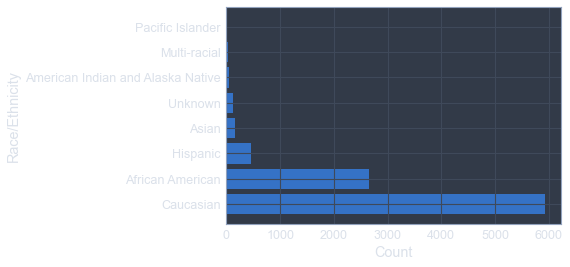

In [13]:
plt.barh(t_race['Race/Ethnicity'], t_race['Count'])
plt.xlabel('Count')
plt.ylabel('Race/Ethnicity')

In [14]:
teeth_demographics.CountyName.value_counts().head(25)

Shelby        2311
Davidson      1973
Rutherford     795
Sullivan       574
Knox           537
Washington     352
Bradley        342
Sevier         184
Maury          179
Wilson         178
Montgomery     170
Sumner         168
Hawkins        161
Bedford        161
Williamson     132
Blount         114
Lawrence       113
Carter         109
Robertson       96
Greene          82
Cheatham        69
Coffee          68
Putnam          68
Johnson         64
Warren          63
Name: CountyName, dtype: int64

In [15]:
# When speaking with the team, it was discovered that more individual patients appear to come from 
# Shelby County as shown above; however, when looking below it appears that more repeat patients come from
# Davidson County.  When repeat patient numbers are used Davidson County surpasses Shelby.
teeth.CountyName.value_counts().head(25)

Davidson      12820
Shelby        11495
Rutherford     5410
Sullivan       3067
Knox           2470
Bradley        2303
Washington     1655
Wilson         1179
Sumner         1166
Maury          1070
Montgomery      932
Williamson      899
Bedford         802
Sevier          775
Hawkins         713
Blount          595
Lawrence        553
Carter          470
Coffee          437
Greene          418
Putnam          413
Robertson       403
Cheatham        374
Cannon          351
Warren          351
Name: CountyName, dtype: int64

In [16]:
# There appears to be some unusual overlaps and gaps in the income brackets.
teeth_demographics['SMILE ON 60+ Demographic Information - Household Income Level'].value_counts()


$0 - $21 280     7474
$21246-$24280    1417
$24281-$27315     445
$28806-$32920     398
$32921-$37035     146
$41561-$46755      82
$36366-$41560      73
$43926-$50200      23
$50201-$56475      13
$59046-$67480       9
$58841-$66195       7
$51486-$58840       6
$67481-$75915       3
$84761-$95355       3
$76121-$85635       3
$66606-$76120       2
$74166-$84760       1
Name: SMILE ON 60+ Demographic Information - Household Income Level, dtype: int64

In [17]:
teeth['SMILE ON 60+ Site Information - Enroller ID'].value_counts()

Interfaith Dental Clinic - Nashville                                                    7995
Interfaith Dental Clinic - Murfreesboro                                                 5100
Church Health Center - Memphis                                                          5074
Matthew Walker Comprehensive Health Center Inc. - Nashville                             3281
Interfaith Health Clinic of Knoxville - Knoxville                                       2738
Karis Dental Clinic - Cleveland                                                         2301
Friends in Need Health Center - Kingsport                                               2089
Healing Hands Health Center - Bristol                                                   1933
Christ Community Health Services- Hickory Hill                                          1575
Keystone Dental Care Inc. - Johnson City                                                1512
Christ Community Health Services- Frayser                             

In [18]:
teeth_demographics['SMILE ON 60+ Site Information - Enroller Location'].value_counts()

Provider Site           5571
Tooth Wisdom             752
Health Assist Office     710
Referral Follow-Up       575
Outreach                  48
Senior Center             18
Name: SMILE ON 60+ Site Information - Enroller Location, dtype: int64

In [19]:
teeth_demographics['SMILE ON 60+ Presumptive Eligibility - Dental Insurance?'].value_counts()

No     8958
Yes     800
Name: SMILE ON 60+ Presumptive Eligibility - Dental Insurance?, dtype: int64

In [20]:
teeth_demographics.loc[teeth_demographics['SMILE ON 60+ Presumptive Eligibility - Dental Insurance?'] == 'No']

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CountyName,StateProvince,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Rutherford,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,SMILE ON 60+ Registration,NaN,9/30/2021 16:53,9/30/2021 16:53,0,4431194,123747,Davidson,TN,...,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN,NaN
2,93115081,SMILE ON 60+ Clinical,NaN,9/30/2021 16:50,9/30/2021 16:51,1,2941341,161979,Shelby,TN,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
3,93115032,SMILE ON 60+ Clinical,NaN,9/30/2021 16:48,9/30/2021 16:49,1,3823933,161979,Shelby,TN,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
4,93114968,SMILE ON 60+ Clinical,NaN,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,Shelby,TN,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57827,55109962,SMILE ON 60+ Registration,NaN,8/1/2018 11:26,8/1/2018 11:31,5,2385100,118843,Davidson,TN,...,NaN,NaN,NaN,Outreach,NaN,NaN,NaN,NaN,NaN,NaN
57828,55109688,SMILE ON 60+ Registration,NaN,8/1/2018 11:19,8/1/2018 11:23,4,2385088,118843,Davidson,TN,...,NaN,NaN,NaN,Tooth Wisdom,NaN,NaN,NaN,NaN,NaN,NaN
57831,55109316,SMILE ON 60+ Registration,NaN,8/1/2018 11:08,8/1/2018 11:11,3,2385054,118820,Davidson,TN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
57834,55108558,SMILE ON 60+ Registration,NaN,8/1/2018 10:48,8/1/2018 11:18,30,2385074,118843,Davidson,TN,...,NaN,NaN,NaN,Outreach,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
teeth_demographics['SMILE ON 60+ Demographic Information - Preferred Language/Language Needed'].value_counts()

English    3154
Spanish     374
Other       116
Arabic       64
Name: SMILE ON 60+ Demographic Information - Preferred Language/Language Needed, dtype: int64

In [22]:
teeth_demographics['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].value_counts()

Yes    3114
No     1363
Name: SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free), dtype: int64

In [23]:
teeth_demographics['SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?'].value_counts()

Dental Clinic Staff                      5474
Other                                    1859
Wisdom Tooth Project Presentation         858
SMILE ON CDHC                             582
Senior Center                             390
This encounter                            382
TV                                        255
Flyer                                     180
Newspaper                                  49
Dental Hotline                             44
SHIP Navigator                             31
Health Assist                              11
Radio                                      11
Tennessee Alliance for Legal Services       2
Habitat for Humanity Greater Memphis        2
Name: SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?, dtype: int64

In [24]:
teeth_demographics['SMILE ON 60+ Case Management Information - Dental Clinic'].value_counts()

Interfaith Dental Clinic - Nashville                                                    16
Interfaith Dental Clinic - Murfreesboro                                                 11
Church Health Center - Memphis                                                          11
Smiles Inc. - South Pittsburg - serving Marion Grundy Franklin and Hamilton Counties     1
Interfaith Health Clinic of Knoxville - Knoxville                                        1
Name: SMILE ON 60+ Case Management Information - Dental Clinic, dtype: int64

In [25]:
teeth_demographics['SMILE ON 60+ Case Management Information - Transportation Barriers'].value_counts()

Cost; Availability - no car/access to transportation    304
Availability - no car/access to transportation          225
Cost                                                    110
Name: SMILE ON 60+ Case Management Information - Transportation Barriers, dtype: int64

In [26]:
teeth_demographics['SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?'].value_counts()

Yes    5781
No     3044
Name: SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?, dtype: int64

In [27]:
teeth_demographics['SMILE ON 60+ Case Management Information - What is the outcome for the client?'].value_counts()

Navigation to dental clinic for dental exam and treatment    38
Enrolled in Wisdom Tooth Project Workshop                     8
Name: SMILE ON 60+ Case Management Information - What is the outcome for the client?, dtype: int64

In [28]:
teeth_demographics['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'].value_counts()

Yes    4697
No      317
Name: SMILE ON 60+ Treatment Plan - Was a treatment plan developed?, dtype: int64

In [29]:
teeth_demographics['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'].value_counts()

Yes    2826
No     2405
Name: SMILE ON 60+ Treatment Plan - Is the treatment plan completed?, dtype: int64

In [30]:
teeth_demographics['SMILE ON 60+ Demographic Information - What other assistance programs are you on?'].value_counts()

SSI/SSDI                               2103
SNAP                                    743
TennCare                                448
SNAP; TennCare                          332
SNAP; SSI/SSDI                          295
SNAP; TennCare; SSI/SSDI                284
TennCare; SSI/SSDI                      259
Section 8                               180
SNAP; Section 8                         120
SNAP; TennCare; Section 8                96
SNAP; TennCare; Section 8; SSI/SSDI      92
Section 8; SSI/SSDI                      70
TennCare; Section 8                      51
SNAP; Section 8; SSI/SSDI                46
TennCare; Section 8; SSI/SSDI            41
Name: SMILE ON 60+ Demographic Information - What other assistance programs are you on?, dtype: int64

In [31]:
teeth_demographics['SMILE ON 60+ Demographic Information - What other assistance programs are you on?'].isnull().sum()

5551

### From the above two lines: 5160 of the 10,711 appear to be on some type of additonal government assistance. 

In [32]:
teeth_demographics['Birth Year'].value_counts()

1957    742
1958    697
1956    671
1959    630
1955    552
       ... 
2019      1
1966      1
1975      1
1964      1
1968      1
Name: Birth Year, Length: 114, dtype: int64

In [33]:
teeth_demographics['Birth Year'] = pd.to_numeric(teeth_demographics['Birth Year'],errors ='coerce')

In [34]:
teeth_demographics['oversixty'] = 2021 - teeth_demographics['Birth Year']

In [35]:
teeth_demographics['oversixty'].value_counts()

64.0    905
65.0    855
63.0    847
62.0    718
66.0    707
       ... 
46.0      1
36.0      1
30.0      1
38.0      1
43.0      1
Name: oversixty, Length: 65, dtype: int64

In [36]:
teeth_demographics['oversixty'].max()
teeth_demographics['oversixty'].min()

0.0

In [37]:
print(teeth_demographics['StateProvince'].isnull().sum())
teeth_demographics['StateProvince'].value_counts()

2


TN    10690
VA       15
GA        2
MS        1
KY        1
Name: StateProvince, dtype: int64

# Below I am locating only the rows where the patient met the criteria of having an age of 60 or above, live in the state of TN, fall into the 200% poverty bracket and are uninsured. I set that to the DF name 'smile' which has 8110 rows of the original 10,711.

###       -According to 2021 federal figures the 2021 200% poverty line is $25,750 which is roughly halfway between the third income bracket [24281-27315]. Given it falls roughly halfway between the floor and ceiling amounts, I will include the entire bracket when subsetting the column.¶

In [38]:
smile = teeth_demographics.loc[(teeth_demographics['StateProvince']=='TN') & (teeth_demographics['SMILE ON 60+ Presumptive Eligibility - Dental Insurance?']=='No') & (teeth_demographics['oversixty']>=60.0) & ((teeth_demographics['SMILE ON 60+ Demographic Information - Household Income Level']== '$0 - $21 280')|(teeth_demographics['SMILE ON 60+ Demographic Information - Household Income Level']== '$21246-$24280')|(teeth_demographics['SMILE ON 60+ Demographic Information - Household Income Level']== '$24281-$27315'))]
smile

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CountyName,StateProvince,...,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility,oversixty
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Rutherford,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
1,93115188,SMILE ON 60+ Registration,NaN,9/30/2021 16:53,9/30/2021 16:53,0,4431194,123747,Davidson,TN,...,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN,NaN,62.0
2,93115081,SMILE ON 60+ Clinical,NaN,9/30/2021 16:50,9/30/2021 16:51,1,2941341,161979,Shelby,TN,...,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN,79.0
3,93115032,SMILE ON 60+ Clinical,NaN,9/30/2021 16:48,9/30/2021 16:49,1,3823933,161979,Shelby,TN,...,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN,61.0
4,93114968,SMILE ON 60+ Clinical,NaN,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,Shelby,TN,...,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57662,55321240,SMILE ON 60+ Clinical,NaN,8/9/2018 9:12,8/9/2018 9:13,1,2393338,118820,Wilson,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0
57738,55266195,SMILE ON 60+ Registration,NaN,8/7/2018 11:54,8/7/2018 11:58,4,2391078,116749,Coffee,TN,...,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN,68.0
57744,55263902,SMILE ON 60+ Clinical,NaN,8/7/2018 10:49,8/7/2018 10:50,1,2384922,116749,Rutherford,TN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,84.0
57752,55262655,SMILE ON 60+ Registration,NaN,8/7/2018 10:13,8/7/2018 10:16,3,2390849,116749,Rutherford,TN,...,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN,73.0


## 1. Who has Smile On been serving (number of patients, age, gender, etc.)?

In [39]:
smile['SMILE ON 60+ Demographic Information - Household Income Level'].value_counts()

$0 - $21 280     6644
$21246-$24280    1126
$24281-$27315     340
Name: SMILE ON 60+ Demographic Information - Household Income Level, dtype: int64

In [40]:
smile['SMILE ON 60+ Demographic Information - Gender'].value_counts()

Female    5051
Male      3006
Name: SMILE ON 60+ Demographic Information - Gender, dtype: int64

In [41]:
smile['SMILE ON 60+ Demographic Information - Race/Ethnicity'].value_counts()

Caucasian                            4411
African American                     2207
Hispanic                              388
Asian                                 126
Unknown                                82
American Indian and Alaska Native      25
Multi-racial                           22
Pacific Islander                        7
Name: SMILE ON 60+ Demographic Information - Race/Ethnicity, dtype: int64

In [42]:
smile.CountyName.value_counts().head(25)

Shelby        1988
Davidson      1424
Sullivan       496
Rutherford     496
Knox           426
Washington     309
Bradley        301
Montgomery     149
Sevier         142
Hawkins        135
Wilson         133
Sumner         127
Maury          113
Bedford        101
Blount          99
Carter          93
Williamson      91
Greene          71
Lawrence        70
Robertson       63
Putnam          55
Johnson         54
Tipton          46
Unicoi          46
Cheatham        45
Name: CountyName, dtype: int64

In [43]:
smile['SMILE ON 60+ Demographic Information - Household Income Level'].value_counts()

$0 - $21 280     6644
$21246-$24280    1126
$24281-$27315     340
Name: SMILE ON 60+ Demographic Information - Household Income Level, dtype: int64

In [44]:
smile['SMILE ON 60+ Site Information - Enroller ID'].value_counts()

Church Health Center - Memphis                                                          856
Interfaith Dental Clinic - Nashville                                                    746
Matthew Walker Comprehensive Health Center Inc. - Nashville                             486
Interfaith Dental Clinic - Murfreesboro                                                 466
Interfaith Health Clinic of Knoxville - Knoxville                                       420
Keystone Dental Care Inc. - Johnson City                                                316
Healing Hands Health Center - Bristol                                                   315
Karis Dental Clinic - Cleveland                                                         292
Friends in Need Health Center - Kingsport                                               277
Christ Community Health Services- Hickory Hill                                          248
Christ Community Health Services- Broad Avenue                                  

In [45]:
smile['SMILE ON 60+ Site Information - Enroller Location'].value_counts()

Provider Site           4890
Health Assist Office     453
Referral Follow-Up       380
Tooth Wisdom             276
Outreach                  25
Senior Center             16
Name: SMILE ON 60+ Site Information - Enroller Location, dtype: int64

In [46]:
smile['SMILE ON 60+ Presumptive Eligibility - Dental Insurance?'].value_counts()

No    8110
Name: SMILE ON 60+ Presumptive Eligibility - Dental Insurance?, dtype: int64

In [47]:
smile['SMILE ON 60+ Demographic Information - Preferred Language/Language Needed'].value_counts()

English    1891
Spanish     323
Other        83
Arabic       56
Name: SMILE ON 60+ Demographic Information - Preferred Language/Language Needed, dtype: int64

In [48]:
smile['SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?'].value_counts()

Dental Clinic Staff                      4720
Other                                    1319
SMILE ON CDHC                             416
Senior Center                             302
This encounter                            293
Wisdom Tooth Project Presentation         286
TV                                        191
Flyer                                     125
Dental Hotline                             37
Newspaper                                  34
SHIP Navigator                             19
Radio                                       9
Health Assist                               9
Habitat for Humanity Greater Memphis        2
Tennessee Alliance for Legal Services       1
Name: SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?, dtype: int64

In [49]:
smile['SMILE ON 60+ Case Management Information - Dental Clinic'].value_counts()

Interfaith Dental Clinic - Nashville                                                    13
Interfaith Dental Clinic - Murfreesboro                                                 10
Church Health Center - Memphis                                                          10
Smiles Inc. - South Pittsburg - serving Marion Grundy Franklin and Hamilton Counties     1
Interfaith Health Clinic of Knoxville - Knoxville                                        1
Name: SMILE ON 60+ Case Management Information - Dental Clinic, dtype: int64

In [50]:
smile['SMILE ON 60+ Demographic Information - What other assistance programs are you on?'].value_counts()

SSI/SSDI                               1561
SNAP                                    614
TennCare                                351
SNAP; TennCare                          272
SNAP; TennCare; SSI/SSDI                255
SNAP; SSI/SSDI                          252
TennCare; SSI/SSDI                      214
Section 8                               128
SNAP; Section 8                          94
SNAP; TennCare; Section 8; SSI/SSDI      81
SNAP; TennCare; Section 8                80
Section 8; SSI/SSDI                      48
TennCare; Section 8                      41
SNAP; Section 8; SSI/SSDI                38
TennCare; Section 8; SSI/SSDI            38
Name: SMILE ON 60+ Demographic Information - What other assistance programs are you on?, dtype: int64

In [51]:
smile['Birth Year'].value_counts()

1957.0    771
1956.0    743
1958.0    739
1959.0    623
1955.0    584
1954.0    440
1960.0    413
1953.0    392
1952.0    336
1951.0    286
1949.0    274
1950.0    272
1948.0    243
1947.0    229
1946.0    197
1944.0    165
1945.0    161
1943.0    147
1961.0    146
1942.0    121
1941.0    108
1940.0     89
1939.0     82
1937.0     72
1938.0     70
1935.0     59
1936.0     58
1934.0     55
1933.0     45
1932.0     39
1930.0     28
1931.0     27
1929.0     23
1900.0     17
1928.0     12
1927.0     11
1925.0     10
1926.0      7
1924.0      6
1922.0      5
1923.0      2
1921.0      2
1918.0      1
Name: Birth Year, dtype: int64

In [52]:
#Creating a decade column and iterating through the DF to see what decade has the majority of patients.
smile['decade']=''
for ind, row in smile.iterrows():
    if row['Birth Year'] >= 1960:
        smile.loc[ind, 'decade'] = "1960's"
    elif row['Birth Year'] >= 1950:
        smile.loc[ind, 'decade'] = "1950's"
    elif row['Birth Year'] >= 1940:
        smile.loc[ind, 'decade'] = "1940's"
    elif row['Birth Year'] >= 1930:
        smile.loc[ind, 'decade'] = "1930's"
    elif row['Birth Year'] >= 1920:
        smile.loc[ind, 'decade'] = "1920's"
    elif row['Birth Year'] < 1920:
        smile.loc[ind, 'decade'] = "Pre 1920"
    else:
        smile.loc[ind, 'decade'] = 'error'
print('finished!')

finished!


In [53]:
#Sanity Check to make sure it worked correctly.
smile.decade

0        1960's
1        1950's
2        1940's
3        1960's
4        1950's
          ...  
57662    1930's
57738    1950's
57744    1930's
57752    1940's
57847    1950's
Name: decade, Length: 8110, dtype: object

In [54]:
smile.decade.value_counts()

1950's      5186
1940's      1734
1960's       559
1930's       535
1920's        78
Pre 1920      18
Name: decade, dtype: int64

In [55]:
# There are clearly some inputting age errors since the data shows there are 17 patients that are 
# 121 years old, 2 patients that are 100 years old, and 1 patient that is 103 years old.  
#(Although 103 and 100 are plausible, I feel it's highly unlikely.)
smile['oversixty'].value_counts()

64.0     771
65.0     743
63.0     739
62.0     623
66.0     584
67.0     440
61.0     413
68.0     392
69.0     336
70.0     286
72.0     274
71.0     272
73.0     243
74.0     229
75.0     197
77.0     165
76.0     161
78.0     147
60.0     146
79.0     121
80.0     108
81.0      89
82.0      82
84.0      72
83.0      70
86.0      59
85.0      58
87.0      55
88.0      45
89.0      39
91.0      28
90.0      27
92.0      23
121.0     17
93.0      12
94.0      11
96.0      10
95.0       7
97.0       6
99.0       5
98.0       2
100.0      2
103.0      1
Name: oversixty, dtype: int64

## 2. Explore the impact of the Smile On program and the outcomes that are produced for clients. Are clients seeing improvement through the Smile On program? 

In [56]:
smile['SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?'].value_counts()

Yes    4638
No     2282
Name: SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?, dtype: int64

In [57]:
smile['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'].value_counts()

Yes    2542
No     2164
Name: SMILE ON 60+ Treatment Plan - Is the treatment plan completed?, dtype: int64

In [58]:
smile['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'].value_counts()

Yes    4189
No      295
Name: SMILE ON 60+ Treatment Plan - Was a treatment plan developed?, dtype: int64

In [59]:
smile['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].value_counts()

Yes    2806
No     1208
Name: SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free), dtype: int64

## 3. Is there any correlation between procedures given and improved outcomes?

In [60]:
work = smile.loc[:, smile.columns.str.startswith('SMILE ON 60+ Oral Care Encounter')]
work

,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,...,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7971 - Quantity,SMILE ON 60+ Oral Care Encounter - 7972 - Quantity,SMILE ON 60+ Oral Care Encounter - 9110 - Quantity,SMILE ON 60+ Oral Care Encounter - 9951 - Quantity,SMILE ON 60+ Oral Care Encounter - Lab Assist narrative,SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274 - Bitewings - four films - 5; 1110 - Proph...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2391 - Posterior one surface resin - 15; 2392...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Code - Denture step Mandibular: may be used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
print(work['SMILE ON 60+ Oral Care Encounter - 1351 - Quantity'].value_counts())
work['SMILE ON 60+ Oral Care Encounter - 2331 - Quantity'].value_counts()

2.0    1
Name: SMILE ON 60+ Oral Care Encounter - 1351 - Quantity, dtype: int64


1.0    99
2.0    30
5.0     2
3.0     2
6.0     1
4.0     1
Name: SMILE ON 60+ Oral Care Encounter - 2331 - Quantity, dtype: int64

In [62]:
work.apply(pd.Series.value_counts)

,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,...,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7971 - Quantity,SMILE ON 60+ Oral Care Encounter - 7972 - Quantity,SMILE ON 60+ Oral Care Encounter - 9110 - Quantity,SMILE ON 60+ Oral Care Encounter - 9951 - Quantity,SMILE ON 60+ Oral Care Encounter - Lab Assist narrative,SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)
1.0,NaN,37.0,5.0,23.0,9.0,1.0,71.0,86.0,99.0,63.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,16.0,NaN,NaN
2.0,1.0,27.0,NaN,2.0,NaN,NaN,37.0,18.0,30.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,13.0,NaN,NaN,NaN,NaN,19.0,8.0,2.0,3.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,9.0,NaN,NaN,NaN,NaN,13.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,5.0,NaN,NaN,NaN,NaN,19.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trans - Transportation Voucher $30; No Code - Denture step Maxillary: may be used for impressions try-in or delivery visits during fabrication up to 3 uses per denture - 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Try in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Video0170 re-evaluation - limited problem focused (established patient; not post-operative visit) $65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
add tooth to partial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


## Beyond the questions outlined above, you are encouraged to continue to explore the data to understand the effectiveness of the Smile On program and to try and see how different factors can impact the clinical results (eg. how do transportation options for clinics affect outcomes?).

In [63]:
smile['SMILE ON 60+ Case Management Information - Transportation Barriers'].value_counts()

Cost; Availability - no car/access to transportation    243
Availability - no car/access to transportation          177
Cost                                                    100
Name: SMILE ON 60+ Case Management Information - Transportation Barriers, dtype: int64

# Using the very first DF to get a count of dental codes used.

In [64]:
#Filtering for the codes only
codes = teeth.filter(regex = '\d{3}')
regex = re.compile(r'\D')
codes.columns = [regex.sub('', x) for x in codes.columns]
codes.columns = [x[2:] for x in codes.columns]

In [65]:
#Fix spelling errors in dental codes
codes.loc[542, '7320'] = 2.0
codes.loc[945, '7140'] = 4.0
codes.loc[271, '4342'] = 2.0
codes.loc[1369, '2393'] = 1.0
codes.loc[741, '2950'] = 1.0

In [66]:
#Making things addable
codes = codes.fillna(0)
codes = codes.astype('float64')

#Setting up the dataframe. Took the codes columns and turned them into a list
dentalcodes = codes.columns.values.tolist()

#Took the codes dataframe and transposed it so I could easily sum them and turned it into a list
transpose = codes.transpose()
answers = np.sum(transpose, axis = 1).tolist()

#Making the dataframe
procedure_count = pd.DataFrame(list(zip(dentalcodes, answers)), columns = ['code', 'count'])

In [67]:
procedure_count.sort_values('count',ascending = False)

,code,count
29,7140,15982.0
6,230,3409.0
1,1354,2892.0
24,4341,2558.0
12,2391,1561.0
13,2392,1553.0
30,7210,1475.0
7,2330,1423.0
8,2331,1280.0
35,7250,1179.0


In [68]:
codes.to_numpy().sum()

38507.0

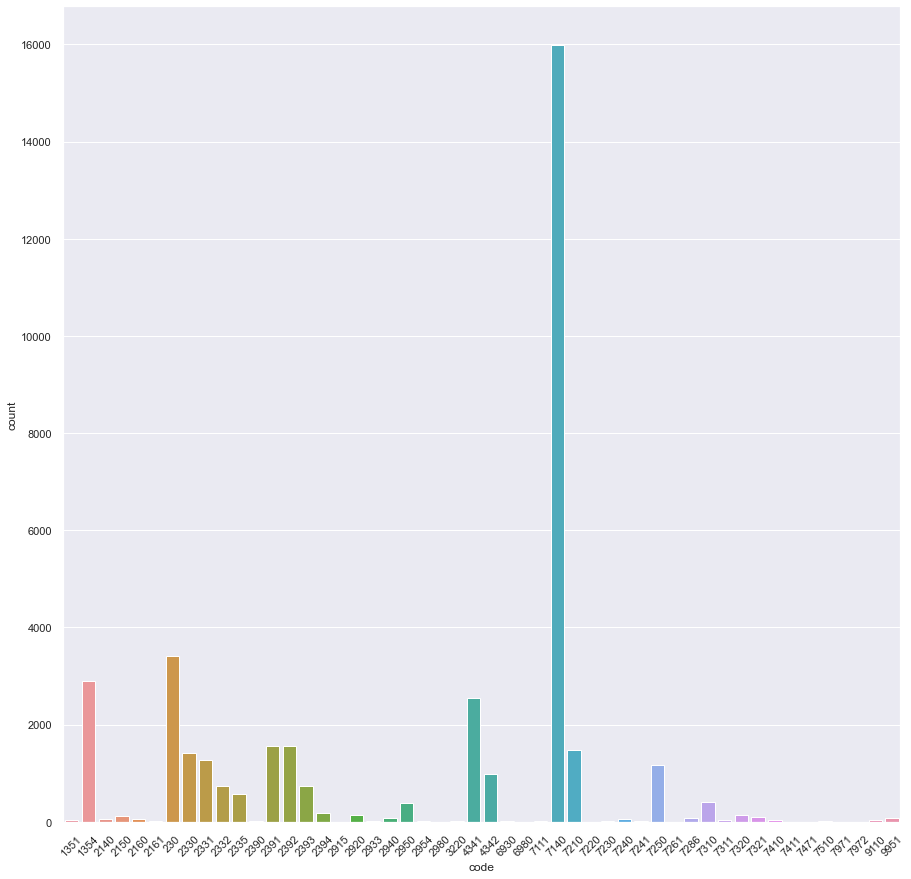

In [82]:
ax = sns.barplot(x="code", y="count", data=procedure_count)
sns.set(rc={"figure.figsize":(20,20)})
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45);

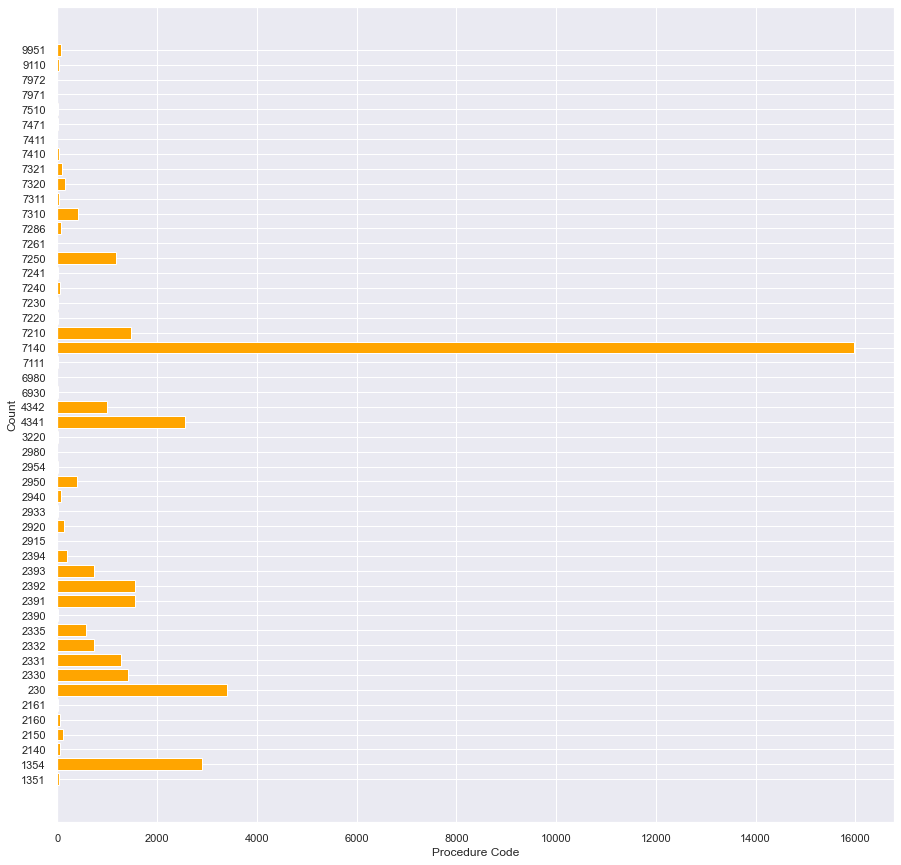

In [70]:
plt.barh(procedure_count['code'], procedure_count['count'], color = 'orange')
plt.xlabel('Procedure Code')
plt.ylabel('Count');
#plt.xticks(rotation = 45)

In [71]:
teeth_demographics['SMILE ON 60+ Oral Care Encounter - 7140 - Quantity'] = pd.to_numeric(teeth_demographics['SMILE ON 60+ Oral Care Encounter - 7140 - Quantity'],errors ='coerce')

In [72]:
teeth_demographics.loc[(~(teeth_demographics['StateProvince']=='TN')) & (teeth_demographics['SMILE ON 60+ Oral Care Encounter - 7140 - Quantity'] > 0)]

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CountyName,StateProvince,...,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility,oversixty
426,93290365,SMILE ON 60+ Clinical,NaN,9/22/2021 14:57,9/22/2021 14:59,2,4568352,134549,Davidson,NaN,...,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,No,Yes,No,NaN,NaN,70.0
